In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("fake_patient_data_v2.csv")
data.head()

,Patient ID,Age,Medical History,Appointment Type,Scheduled Duration,Actual Duration,Appointment Priority,Patient Complexity Score,Provider Specialty,Wait Time (minutes)
0,PT-001,28,"Diabetes, None, Hypertension",Urgent Care,30,35,Urgent,4,Cardiologist,21
1,PT-002,25,Hypertension,Follow-up,30,40,Urgent,2,General Practitioner,20
2,PT-003,43,"None, Hypertension",Routine Check-up,30,20,Medium,2,General Practitioner,53
3,PT-004,87,"Hypertension, Asthma",Routine Check-up,15,5,Low,3,General Practitioner,16
4,PT-005,83,"None, Heart Disease",Follow-up,30,40,Low,3,General Practitioner,90


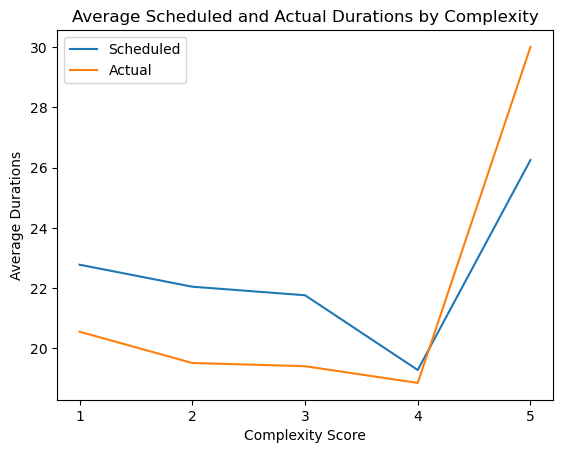

In [23]:
# Does scheduled time for appointments aligns with the complexity of the case (i.e., more complex cases should have longer time slots)?

# Find the unique complexity scores
complexity_score = data.sort_values(by="Patient Complexity Score")["Patient Complexity Score"].unique()

# Find the average scheduled and actual duration for each complexity score
avg_scheduled_by_complexity = data.groupby("Patient Complexity Score")["Scheduled Duration"].mean()
avg_actual_by_complexity = data.groupby("Patient Complexity Score")["Actual Duration"].mean()


# Plot a line graph
x =range(5)
plt.plot(x, avg_scheduled_by_complexity)
plt.plot(x, avg_actual_by_complexity)
plt.title("Average Scheduled and Actual Durations by Complexity")
plt.xticks(x, complexity_score)
plt.xlabel("Complexity Score")
plt.ylabel("Average Durations")
plt.legend(["Scheduled", "Actual"])
plt.show()


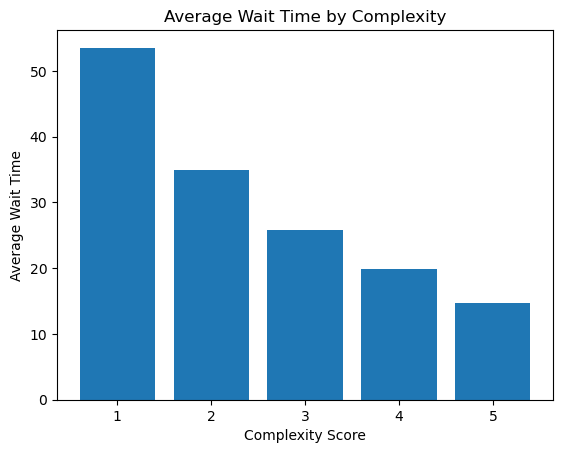

In [17]:
# How long patients are waiting before their appointments and whether this wait time correlates with the complexity of the case.

# Find the average wait time for each complexity score
avg_wait_by_complexity = data.groupby("Patient Complexity Score")["Wait Time (minutes)"].mean()

# Plot a bar graph
x =range(5)
plt.bar(x, avg_wait_by_complexity)
plt.title("Average Wait Time by Complexity")
plt.xticks(x, complexity_score)
plt.xlabel("Complexity Score")
plt.ylabel("Average Wait Time")
plt.show()

Patient Complexity Score
3   -2.352941
4   -0.428571
5    3.750000
Name: time_difference, dtype: float64


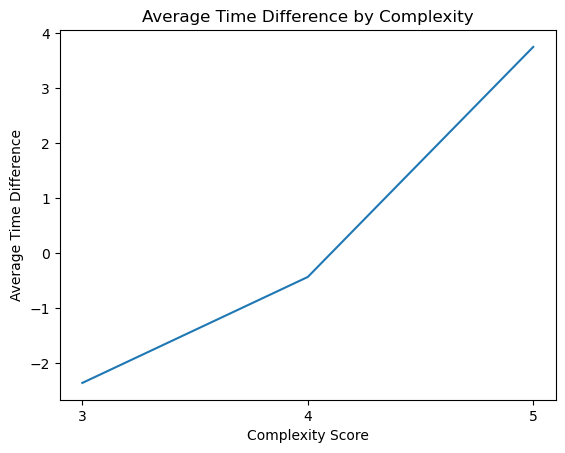

In [19]:
# Analyze how well providers are able to meet the needs of high-complexity cases within the given time slots.

# Data with only high complexity cases
data_complex = data[data["Patient Complexity Score"] >= 3].copy()

data_complex["time_difference"] = data_complex["Actual Duration"] - data_complex["Scheduled Duration"]

avg_time_by_complexity = data_complex.groupby("Patient Complexity Score")["time_difference"].mean()
# print(avg_time_by_complexity)

# Plot a bar graph
x = range(3)
plt.plot(x, avg_time_by_complexity)
plt.title("Average Time Difference by Complexity")
plt.xticks(x, [3, 4, 5])
plt.xlabel("Complexity Score")
plt.ylabel("Average Time Difference")
plt.show()

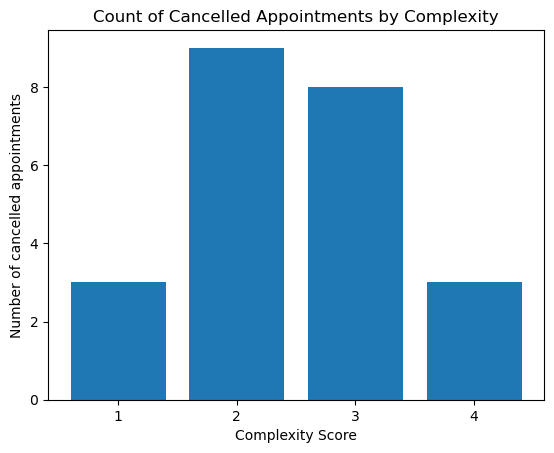

In [9]:
# Correlate cancellations with scheduling patterns and patient complexity.

# Data with only cancelled appointments
data_cancel = data[data["Actual Duration"] == 0].copy()

# Count the number of cancelled appointments for each complexity score
count_cancelled = data_cancel.groupby("Patient Complexity Score")["Actual Duration"].count()
# print(count_cancelled)

# Plot a bar graph
x =range(4)
plt.bar(x, count_cancelled)
plt.title("Count of Cancelled Appointments by Complexity")
plt.xticks(x, [1, 2, 3, 4])
plt.xlabel("Complexity Score")
plt.ylabel("Number of cancelled appointments")
plt.show()

In [35]:
# Cancellataion rate

data["Cancelled"] = data["Actual Duration"] == 0
appointment_cancel_rate = data.groupby("Patient Complexity Score")["Cancelled"].mean() * 100
print(appointment_cancel_rate)

Patient Complexity Score
1    11.111111
2    10.843373
3    15.686275
4     8.571429
5     0.000000
Name: Cancelled, dtype: float64
